# 04 数据的容器 ———— Pandas

参考视频
https://turingplanet.org/pandas_intro_tutorial/

## 2.5 DataFrame，数据表

上述数据类型都是在底层工作的，我们实际要处理的数据很想excel表格。
- 二维表，有行有列，行有编号1,2,3...，列有名称
- 每个单元格（cell）里存放的数据可能是数字、小数、科学计数、文本、布尔数据（是或否）、时间（年月日、时分秒）
- 需要整列运算数据
- 需要多行筛选、排序
- 需要把一个数据表拆分成多个
- 需要把多个数据表合并成一个

DataFrame应运而生，它包含了excel所有的数据处理功能，甚至更多。
DataFrame不是python内置的，需要先导入包再使用。

### 2.5.1 Dataframe数据加载

In [1]:
import pandas as pd

df = pd.read_csv('data/LC-MS.csv')
# 返回的df是DataFrame类型，也可以从其它数据库、文本文件、网页文件和剪贴板中导入数据
# 也可以把数据导出到各种数据文件中
df.head(3)

Average Rt(min)  Average Mz              Metabolite name Adduct type  \
0            1.616    72.08069          C12244;C12244;CFMID      [M+H]+   
1            1.458    72.08071          C12244;C12244;CFMID      [M+H]+   
2            1.674    74.05996  C00263;L-Homoserine;inhouse    [M-UNK]+   

   Formula Ontology                     INCHIKEY             SMILES  \
0    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N             C=CCCN   
1    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N             C=CCCN   
2  C4H9NO3      NaN  UKAUYVFTDYCKQA-VKHMYHEASA-N  N[C@H](C(O)=O)CCO   

   MS/MS matched  Matched peaks count  Matched peaks percentage  Total score  \
0           True                    7                      0.57         1.47   
1           True                    7                      0.57         1.47   
2           True                    3                      0.33         1.68   

           G1_2          G1_3          G2_1          G2_2          G2_3  
0  2.153791e+08  3.298944e+08  3.024013e+08  2.554517e+08  2.960232e+08  
1  5.680004e+07  4.699128e+07  5.367473e+07  8.490319e+07  4.850104e+07  
2  6.999451e+07  9.600511e+07  6.023802e+07  3.765911e+07  8.988370e+07

In [2]:
df.tail()

Average Rt(min)  Average Mz                         Metabolite name  \
259           18.717   680.47894  C03044;(2R,3R)-Butane-2,3-diol;inhouse   
260           18.269   680.47894     C02137;Phenylglyoxylic acid;inhouse   
261           19.400   680.47894               C16971;Hirsuteine;inhouse   
262           17.281   680.47931     C02137;Phenylglyoxylic acid;inhouse   
263           17.393   708.51068     C06426;Gamma-Linolenic acid;inhouse   

    Adduct type     Formula Ontology                     INCHIKEY  \
259    [M+UNK]+     C4H10O2      NaN  OWBTYPJTUOEWEK-QWWZWVQMSA-N   
260    [M+UNK]+      C8H6O3      NaN  FAQJJMHZNSSFSM-UHFFFAOYSA-N   
261    [M+UNK]+  C22H26N2O3      NaN  TZUGIFAYWNNSAO-AZQGJTAVSA-N   
262    [M+UNK]+      C8H6O3      NaN  FAQJJMHZNSSFSM-UHFFFAOYSA-N   
263    [M+UNK]+    C18H30O2      NaN  VZCCETWTMQHEPK-QNEBEIHSSA-N   

                                                SMILES  MS/MS matched  \
259                                C[C@@H](O)[C@H](O)C           True   
260                             O=C(O)C(C1=CC=CC=C1)=O           True   
261  [H][C@]1([C@](/C(C(OC)=O)=C\OC)([H])C[C@]2([H]...           True   
262                             O=C(O)C(C1=CC=CC=C1)=O           True   
263                   CCCCC/C=C\C/C=C\C/C=C\CCCCC(O)=O           True   

     Matched peaks count  Matched peaks percentage  Total score         G1_2  \
259                   12                      0.33         1.49  59713444.23   
260                   11                      0.27         1.51  84349130.07   
261                   13                      0.31         1.49  61973019.63   
262                   11                      0.36         1.48  42503486.53   
263                   12                      0.25         1.42  84362176.03   

            G1_3          G2_1         G2_2         G2_3  
259  44600690.01  2.035576e+07  66484532.02  38173392.41  
260  78555602.89  2.734778e+07  91643089.02  69889740.61  
261  66551939.28  3.487791e+07  52158093.15  52135447.81  
262  43969125.55  6.269818e+07  48961702.46  14322847.59  
263  83312543.36  1.359576e+08  98451097.33  18628403.98

In [4]:
df.shape

(264, 17)

In [5]:
df.index

RangeIndex(start=0, stop=264, step=1)

In [13]:
df.columns

Index(['Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type',
       'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'MS/MS matched',
       'Matched peaks count', 'Matched peaks percentage', 'Total score',
       'G1_2', 'G1_3', 'G2_1', 'G2_2', 'G2_3'],
      dtype='object')

### 2.5.2 列数据、行数据引用

In [9]:
# 获取整列
df[['Average Rt(min)', 'Average Mz','Matched peaks count']]

Average Rt(min)  Average Mz  Matched peaks count
0              1.616    72.08069                    7
1              1.458    72.08071                    7
2              1.674    74.05996                    3
3              1.250    76.03921                    5
4              1.627    79.02108                   10
..               ...         ...                  ...
259           18.717   680.47894                   12
260           18.269   680.47894                   11
261           19.400   680.47894                   13
262           17.281   680.47931                   11
263           17.393   708.51068                   12

[264 rows x 3 columns]

In [26]:
# 获取一行
df.iloc[9]

Average Rt(min)                                   1.257
Average Mz                                     90.05482
Metabolite name                     C00041;C00041;CFMID
Adduct type                                      [M+H]+
Formula                                         C3H7NO2
Ontology                                            NaN
INCHIKEY                    QNAYBMKLOCPYGJ-REOHCLBHSA-N
SMILES                                  C[C@H](N)C(=O)O
MS/MS matched                                      True
Matched peaks count                                   3
Matched peaks percentage                            1.0
Total score                                        1.77
G1_2                                        31850500.94
G1_3                                        64628139.75
G2_1                                        43734793.29
G2_2                                        46828251.71
G2_3                                        37470441.34
Name: 9, dtype: object

In [27]:
# 获取多行（数据切片）
#df中的行索引存放在了loc属性里

df.loc[:2]

#获取行编号0-2的行

Average Rt(min)  Average Mz              Metabolite name Adduct type  \
0            1.616    72.08069          C12244;C12244;CFMID      [M+H]+   
1            1.458    72.08071          C12244;C12244;CFMID      [M+H]+   
2            1.674    74.05996  C00263;L-Homoserine;inhouse    [M-UNK]+   

   Formula Ontology                     INCHIKEY             SMILES  \
0    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N             C=CCCN   
1    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N             C=CCCN   
2  C4H9NO3      NaN  UKAUYVFTDYCKQA-VKHMYHEASA-N  N[C@H](C(O)=O)CCO   

   MS/MS matched  Matched peaks count  Matched peaks percentage  Total score  \
0           True                    7                      0.57         1.47   
1           True                    7                      0.57         1.47   
2           True                    3                      0.33         1.68   

           G1_2          G1_3          G2_1          G2_2          G2_3  
0  2.153791e+08  3.298944e+08  3.024013e+08  2.554517e+08  2.960232e+08  
1  5.680004e+07  4.699128e+07  5.367473e+07  8.490319e+07  4.850104e+07  
2  6.999451e+07  9.600511e+07  6.023802e+07  3.765911e+07  8.988370e+07

In [29]:
# 自定义多行,花式索引
df.loc[[1,3,16,7]]

Average Rt(min)  Average Mz                         Metabolite name  \
1             1.458    72.08071                     C12244;C12244;CFMID   
3             1.250    76.03921  C00037;Glycine; AIF; CE10; MS2Dec;MoNA   
16            1.912   104.10680                     C00114;CHOLINE;MoNA   
7             4.574    83.06027                     C19262;C19262;CFMID   

   Adduct type  Formula Ontology                     INCHIKEY          SMILES  \
1       [M+H]+    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N          C=CCCN   
3       [M+H]+  C2H5NO2      NaN  DHMQDGOQFOQNFH-UHFFFAOYSA-N        O=C(O)CN   
16        [M]+  C5H14NO      NaN  OEYIOHPDSNJKLS-UHFFFAOYSA-N  OCC[N+](C)(C)C   
7       [M+H]+   C4H6N2      NaN  XLSZMDLNRCVEIJ-UHFFFAOYSA-N     Cc1cnc[nH]1   

    MS/MS matched  Matched peaks count  Matched peaks percentage  Total score  \
1            True                    7                      0.57         1.47   
3            True                    5                      0.40         1.58   
16           True                    9                      0.33         1.67   
7            True                    5                      0.60         1.42   

            G1_2          G1_3          G2_1          G2_2          G2_3  
1   5.680004e+07  4.699128e+07  5.367473e+07  8.490319e+07  4.850104e+07  
3   4.955085e+07  8.532785e+07  7.484436e+07  7.181890e+07  5.938876e+07  
16  1.179760e+09  1.481314e+09  1.277634e+09  1.698198e+09  1.291239e+09  
7   1.410845e+07  8.694241e+07  1.247902e+08  3.864554e+07  3.952615e+07

In [31]:
## 取行，也要取列

df.loc[[1,2,3,16], ['Average Rt(min)', 'Formula']]

Average Rt(min)  Formula
1             1.458    C4H9N
2             1.674  C4H9NO3
3             1.250  C2H5NO2
16            1.912  C5H14NO

In [39]:
# 获得头几行
df.head(4)

smiles  \
0                                 O=Cc1ccccc1   
1  O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   
2     O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   
3        O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12   

                                                name       MolWt    TPSA  \
0                           benzaldehyde|Benzaldehyd  106.041865   17.07   
1  quercetol|2-(3,4-dihydroxyphenyl)-3,5,7-trihyd...  302.042653  131.36   
2  2-(3,4-Dihydroxy-phenyl)-5,7-dihydroxy-chromen...  286.047738  111.13   
3  5,7-dihydroxy-2-(4-hydroxyphenyl)-4H-1-benzopy...  270.052823   90.90   

   nRotB  HBD  HBA    LogP  
0      1    0    1  1.4991  
1      1    5    7  1.9880  
2      1    4    6  2.2824  
3      1    3    5  2.5768

In [40]:
# 获得尾几行
df.tail(5)

smiles  \
87                     O=C[C@H](O)[C@@H](O)[C@H](O)CO   
88            O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12   
89  O=C(/C=C/c1ccc(O)c(O)c1)O[C@@H]1C[C@](O)(C(=O)...   
90                            O=C(O)c1cc(O)c(O)c(O)c1   
91            O=C[C@H](O)[C@@H](O)[C@@H](O)[C@H](O)CO   

                                                 name       MolWt    TPSA  \
87                                           D-xylose  150.052823   97.99   
88  kaempferol|3,5,7-trihydroxy-2-(4-hydroxyphenyl...  286.047738  111.13   
89             3-caffeoylquinic acid|chlorogenic acid  354.095082  164.75   
90  3,4,5-trihydroxybenzoic acid|gallic acid|3,4,5...  170.021523   97.99   
91                                        D-Galactose  180.063388  118.22   

    nRotB  HBD  HBA    LogP  
87      4    4    5 -2.7397  
88      1    4    6  2.2824  
89      4    6    8 -0.6459  
90      1    4    4  0.5016  
91      5    5    6 -3.3788

In [36]:
data = df.loc[[1,2,3,7], ['G2_1', 'G2_2', 'G2_3']].values
type(data)

numpy.ndarray

In [38]:
df.loc[[1,2,3,7], ['G2_1', 'G2_2', 'G2_3']]

G2_1         G2_2         G2_3
1  5.367473e+07  84903186.23  48501044.77
2  6.023802e+07  37659110.47  89883700.70
3  7.484436e+07  71818900.24  59388762.24
7  1.247902e+08  38645540.00  39526152.22

In [37]:
data

array([[5.36747260e+07, 8.49031862e+07, 4.85010448e+07],
       [6.02380160e+07, 3.76591105e+07, 8.98837007e+07],
       [7.48443597e+07, 7.18189002e+07, 5.93887622e+07],
       [1.24790224e+08, 3.86455400e+07, 3.95261522e+07]])

### 2.3.2 DataFrame 的增改
#### 整列改变

In [52]:
import numpy as np

# 通常做类似出列
df['log_G2_1'] = np.log10(df['G2_1'])
df.head(3)

Average Rt(min)  Average Mz              Metabolite name Adduct type  \
0            1.616    72.08069          C12244;C12244;CFMID      [M+H]+   
1            1.458    72.08071          C12244;C12244;CFMID      [M+H]+   
2            1.674    74.05996  C00263;L-Homoserine;inhouse    [M-UNK]+   

   Formula Ontology                     INCHIKEY             SMILES  \
0    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N             C=CCCN   
1    C4H9N      NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N             C=CCCN   
2  C4H9NO3      NaN  UKAUYVFTDYCKQA-VKHMYHEASA-N  N[C@H](C(O)=O)CCO   

   MS/MS matched  Matched peaks count  Matched peaks percentage  Total score  \
0           True                    7                      0.57         1.47   
1           True                    7                      0.57         1.47   
2           True                    3                      0.33         1.68   

           G1_2          G1_3          G2_1          G2_2          G2_3  \
0  2.153791e+08  3.298944e+08  3.024013e+08  2.554517e+08  2.960232e+08   
1  5.680004e+07  4.699128e+07  5.367473e+07  8.490319e+07  4.850104e+07   
2  6.999451e+07  9.600511e+07  6.023802e+07  3.765911e+07  8.988370e+07   

   log_G2_1  
0  8.480584  
1  7.729770  
2  7.779871

In [53]:
df[['G2_1', 'log_G2_1']]

G2_1  log_G2_1
0    3.024013e+08  8.480584
1    5.367473e+07  7.729770
2    6.023802e+07  7.779871
3    7.484436e+07  7.874159
4    9.390745e+09  9.972700
..            ...       ...
259  2.035576e+07  7.308687
260  2.734778e+07  7.436922
261  3.487791e+07  7.542550
262  6.269818e+07  7.797255
263  1.359576e+08  8.133403

[264 rows x 2 columns]

#### 增加行和列

In [54]:
df_new = df.sample(20).copy()

In [56]:
df = pd.concat([df, df_new])

In [57]:
df.shape

(284, 18)

In [64]:
df2 = df.copy()

In [65]:
# 删除列
df2 = df2.drop('log_G2_1', axis=1)
# axis=1,指定按列删除
df2

Average Rt(min)  Average Mz  \
0              1.616    72.08069   
1              1.458    72.08071   
2              1.674    74.05996   
3              1.250    76.03921   
4              1.627    79.02108   
..               ...         ...   
230           13.518   400.34183   
222           17.728   400.34155   
224           16.146   400.34158   
236           18.345   408.36795   
17             8.787   107.07011   

                                       Metabolite name Adduct type    Formula  \
0                                  C12244;C12244;CFMID      [M+H]+      C4H9N   
1                                  C12244;C12244;CFMID      [M+H]+      C4H9N   
2                          C00263;L-Homoserine;inhouse    [M-UNK]+    C4H9NO3   
3               C00037;Glycine; AIF; CE10; MS2Dec;MoNA      [M+H]+    C2H5NO2   
4                        C11143;Dimethyl?sulfoxide;msd      [M+H]+     C2H6OS   
..                                                 ...         ...        ...   
230  C02990;Palmitoyl-carnitine; AIF; CE30; MS2Dec;...      [M+H]+  C23H45NO4   
222  C02990;Palmitoyl-carnitine; AIF; CE30; MS2Dec;...      [M+H]+  C23H45NO4   
224  C02990;Palmitoyl-carnitine; AIF; CE30; MS2Dec;...      [M+H]+  C23H45NO4   
236      C10354;2-(Hydroxymethyl)anthraquinone;inhouse    [M+UNK]+   C15H10O3   
17                                 C14689;C14689;CFMID      [M+H]+    C4H10O3   

       Ontology                     INCHIKEY  \
0           NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N   
1           NaN  ASVKKRLMJCWVQF-UHFFFAOYSA-N   
2           NaN  UKAUYVFTDYCKQA-VKHMYHEASA-N   
3           NaN  DHMQDGOQFOQNFH-UHFFFAOYSA-N   
4    Sulfoxides  IAZDPXIOMUYVGZ-UHFFFAOYSA-N   
..          ...                          ...   
230         NaN  XOMRRQXKHMYMOC-OAQYLSRUSA-N   
222         NaN  XOMRRQXKHMYMOC-OAQYLSRUSA-N   
224         NaN  XOMRRQXKHMYMOC-OAQYLSRUSA-N   
236         NaN  JYKHAJGLEVKEAA-UHFFFAOYSA-N   
17          NaN  MTHSVFCYNBDYFN-UHFFFAOYSA-N   

                                             SMILES  MS/MS matched  \
0                                            C=CCCN           True   
1                                            C=CCCN           True   
2                                 N[C@H](C(O)=O)CCO           True   
3                                          O=C(O)CN           True   
4                                           O=S(C)C           True   
..                                              ...            ...   
230  O=C([O-])CC(OC(=O)CCCCCCCCCCCCCCC)C[N+](C)(C)C           True   
222  O=C([O-])CC(OC(=O)CCCCCCCCCCCCCCC)C[N+](C)(C)C           True   
224  O=C([O-])CC(OC(=O)CCCCCCCCCCCCCCC)C[N+](C)(C)C           True   
236          O=C1C2=C(C=C(CO)C=C2)C(C3=C1C=CC=C3)=O           True   
17                                          OCCOCCO           True   

     Matched peaks count  Matched peaks percentage  Total score          G1_2  \
0                      7                      0.57         1.47  2.153791e+08   
1                      7                      0.57         1.47  5.680004e+07   
2                      3                      0.33         1.68  6.999451e+07   
3                      5                      0.40         1.58  4.955085e+07   
4                     10                      0.40         1.68  2.336511e+10   
..                   ...                       ...          ...           ...   
230                    5                      0.40         1.64  1.430898e+05   
222                    5                      0.40         1.64  3.431087e+04   
224                    5                      0.60         1.67  6.617041e+05   
236                   21                      0.33         1.70  1.549098e+07   
17                     3                      0.33         1.66  2.150807e+07   

             G1_3          G2_1          G2_2          G2_3  
0    3.298944e+08  3.024013e+08  2.554517e+08  2.960232e+08  
1    4.699128e+07  5.367473e+07  8.490319e+07  4.850104e+07  
2    9.600511e+07  6.0

### 2.3.3 DataFrame 信息概要

In [66]:
# 查看DataFrame元素个数
df.size #看开发者文档，pandas dataframe，  码农

5112

In [67]:
# 查看基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 17
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Rt(min)           284 non-null    float64
 1   Average Mz                284 non-null    float64
 2   Metabolite name           284 non-null    object 
 3   Adduct type               284 non-null    object 
 4   Formula                   284 non-null    object 
 5   Ontology                  49 non-null     object 
 6   INCHIKEY                  284 non-null    object 
 7   SMILES                    284 non-null    object 
 8   MS/MS matched             284 non-null    bool   
 9   Matched peaks count       284 non-null    int64  
 10  Matched peaks percentage  284 non-null    float64
 11  Total score               284 non-null    float64
 12  G1_2                      284 non-null    float64
 13  G1_3                      284 non-null    float64
 14  G2_1            

In [68]:
# 查看列的数据类型
df.dtypes

Average Rt(min)             float64
Average Mz                  float64
Metabolite name              object
Adduct type                  object
Formula                      object
Ontology                     object
INCHIKEY                     object
SMILES                       object
MS/MS matched                  bool
Matched peaks count           int64
Matched peaks percentage    float64
Total score                 float64
G1_2                        float64
G1_3                        float64
G2_1                        float64
G2_2                        float64
G2_3                        float64
log_G2_1                    float64
dtype: object

In [69]:
df['G2_1'].describe()

count    2.840000e+02
mean     4.281146e+08
std      1.679414e+09
min      1.178917e+03
25%      1.399581e+07
50%      4.070286e+07
75%      1.549492e+08
max      1.913928e+10
Name: G2_1, dtype: float64

In [74]:
df['INCHIKEY'].nunique()

144

### 2.3.3 DataFrame 排序

In [77]:
# 单列排序

df.sort_values(by='Average Mz',ascending=False, inplace=True)


In [12]:
# 多列排序
#df.sort_values(by=['HBA','HBD'], ascending=False)
df.sort_values(by=['HBD','HBA'], ascending=False)

smiles  \
76  COc1cc(O)c2c(=O)c(O[C@@H]3OC[C@@](O)(CO[C@@H]4...   
86  C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)...   
71  O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O[C@@H]3O[C@H](C...   
28  O=c1c(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...   
75  Cc1c(O[C@@H]2OC[C@@H](O)[C@H](O[C@@H]3OC[C@@H]...   
..                                                ...   
63                                CC1C=CC2(C(C)C)CC12   
64                          C=CC(=C)CCC=C(C)CCC=C(C)C   
67                        CC1=CC2C(=C(C)CCCC2(C)C)CC1   
73                                 C=CC(C)=CC=CC(=C)C   
79                                   C=CC1=C2CCC2CCC1   

                                                 name       MolWt    TPSA  \
76                                                NaN  726.200729  297.12   
86                                        rutin|RUTIN  610.153385  269.43   
71  morin-7-O-beta-D-glucopyranoside|morin-7-O-bet...  464.095476  210.51   
28  astragalin|kaempferol-3-glucoside|Astragalin|5...  448.100562  190.28   
75                                                NaN  534.173726  184.60   
..                                                ...         ...     ...   
63  4-methylene-1-(1-methylethyl)bicyclo[3.1.0]hex...  136.125200    0.00   
64  7,11-dimethyl-3-methylene-1,6,10-dodecatriene|...  204.187801    0.00   
67  2,4a,5,6,7,8-hexahydro-3,5,5,9-tetramethyl-1H-...  204.187801    0.00   
73  2,6-dimethyl-1,3,5,7-octatetraene|2,6-dimethyl...  134.109550    0.00   
79               7-exo-ethenylbicyclo[4.2.0]oct-1-ene  134.109550    0.00   

    nRotB  HBD  HBA     LogP  
76     11   10   19 -3.36280  
86      6   10   16 -1.68710  
71      4    8   12 -0.53890  
28      4    7   11 -0.24450  
75      5    6   12 -0.31178  
..    ...  ...  ...      ...  
63      1    0    0  2.85460  
64      7    0    0  5.20150  
67      0    0    0  4.86930  
73      3    0    0  3.25100  
79      1    0    0  3.06290  

[92 rows x 8 columns]

### 2.3.4 过滤、筛选

In [88]:
# 不使用loc函数也可以

df[(df['Average Mz'] >= 500) & \
   (df['Average Mz'] <= 600)]

Average Rt(min)  Average Mz                       Metabolite name  \
253           19.544   585.27020  C00486;Bilirubin; LC-tDDA; CE40;MoNA   
253           19.544   585.27020  C00486;Bilirubin; LC-tDDA; CE40;MoNA   
252           18.058   559.51636             C17446;Kurarinone;inhouse   
250           17.750   559.51630             C17446;Kurarinone;inhouse   
251           17.273   559.51630             C17446;Kurarinone;inhouse   
249           17.346   519.13837             C08817;Fucosterol;inhouse   
248           14.230   504.32309           C00022;Pyruvic acid;inhouse   

    Adduct type     Formula Ontology                     INCHIKEY  \
253      [M+H]+  C33H36N4O6      NaN  BPYKTIZUTYGOLE-IFADSCNNSA-N   
253      [M+H]+  C33H36N4O6      NaN  BPYKTIZUTYGOLE-IFADSCNNSA-N   
252    [M+UNK]+    C26H30O6      NaN  LTTQKYMNTNISSZ-MWTRTKDXSA-N   
250    [M+UNK]+    C26H30O6      NaN  LTTQKYMNTNISSZ-MWTRTKDXSA-N   
251    [M+UNK]+    C26H30O6      NaN  LTTQKYMNTNISSZ-MWTRTKDXSA-N   
249    [M+UNK]+     C29H48O      NaN  OSELKOCHBMDKEJ-JUGJNGJRSA-N   
248    [M+UNK]+      C3H4O3      NaN  LCTONWCANYUPML-UHFFFAOYSA-N   

                                                SMILES  MS/MS matched  \
253  O=C(O)CCC1=C(NC(C=C2N=C(O)C(=C2C=C)C)=C1C)CC=3...           True   
253  O=C(O)CCC1=C(NC(C=C2N=C(O)C(=C2C=C)C)=C1C)CC=3...           True   
252  OC(C=C1)=CC(O)=C1[C@@H]2CC(C3=C(OC)C=C(O)C(C[C...           True   
250  OC(C=C1)=CC(O)=C1[C@@H]2CC(C3=C(OC)C=C(O)C(C[C...           True   
251  OC(C=C1)=CC(O)=C1[C@@H]2CC(C3=C(OC)C=C(O)C(C[C...           True   
249  CC(C)/C(/CC[C@@H](C)[C@@H](CC1)[C@@](C)(CC2)[C...           True   
248                                       CC(C(O)=O)=O           True   

     Matched peaks count  Matched peaks percentage  Total score          G1_2  \
253                    8                      0.50         1.61  3.563278e+06   
253                    8                      0.50         1.61  3.563278e+06   
252                    3                      0.67         1.66  3.194407e+07   
250                    3                      0.67         1.66  5.850167e+07   
251                    3                      0.67         1.66  1.928304e+07   
249                   33                      0.30         1.45  3.131875e+06   
248                   14                      0.36         1.52  3.503598e+06   

             G1_3          G2_1          G2_2          G2_3  log_G2_1  
253  2.546032e+06  6.217936e+06  6.133714e+06  4.558848e+06  6.793646  
253  2.546032e+06  6.217936e+06  6.133714e+06  4.558848e+06  6.793646  
252  1.403485e+07  6.160364e+07  4.516781e+07  4.575779e+07  7.789606  
250  2.076818e+07  2.766266e+08  7.997221e+07  6.547063e+07  8.441894  
251  6.540624e+06  1.726800e+07  9.403136e+06  2.106992e+07  7.237242  
249  4.062370e+06  4.634789e+06  3.882763e+06  3.667451e+06  6.666030  
248  2.431596e+06  8.036579e+06  3.166362e+06  2.250061e+06  6.905071

In [92]:
df.loc[(df['Average Mz'] >= 500) & \
       (df['Average Mz'] <= 600), 'Metabolite name']

253    C00486;Bilirubin; LC-tDDA; CE40;MoNA
253    C00486;Bilirubin; LC-tDDA; CE40;MoNA
252               C17446;Kurarinone;inhouse
250               C17446;Kurarinone;inhouse
251               C17446;Kurarinone;inhouse
249               C08817;Fucosterol;inhouse
248             C00022;Pyruvic acid;inhouse
Name: Metabolite name, dtype: object

### 2.3.5 DataFrame 列运算

- 对当前df所做的所有数据处理会保存在一个临时的内存块里，不会修改原有的df
- 如果要保留结果，需要将运算结果赋值给一个新的变量

In [83]:
df[['G2_2', 'G2_1']] * 100

G2_2          G2_1
263  9.845110e+09  1.359576e+10
262  4.896170e+09  6.269818e+09
262  4.896170e+09  6.269818e+09
261  5.215809e+09  3.487791e+09
260  9.164309e+09  2.734778e+09
..            ...           ...
4    9.984601e+11  9.390745e+11
3    7.181890e+09  7.484436e+09
2    3.765911e+09  6.023802e+09
1    8.490319e+09  5.367473e+09
0    2.554517e+10  3.024013e+10

[284 rows x 2 columns]

In [84]:
df['G2_2'] + df['G2_1']

263    2.344087e+08
262    1.116599e+08
262    1.116599e+08
261    8.703600e+07
260    1.189909e+08
           ...     
4      1.937535e+10
3      1.466633e+08
2      9.789713e+07
1      1.385779e+08
0      5.578530e+08
Length: 284, dtype: float64

In [40]:
# 除了加减乘除，还有取整、求余、幂运算
## 取整,除法的商
df_v3 // 2

TPSA  HBD  HBA  LogP
0    8.0    0    0   0.0
1   65.0    2    3   0.0
2   55.0    2    3   1.0
3   45.0    1    2   1.0
4    0.0    0    0   1.0
..   ...  ...  ...   ...
87  48.0    2    2  -2.0
88  55.0    2    3   1.0
89  82.0    3    4  -1.0
90  48.0    2    2   0.0
91  59.0    2    3  -2.0

[92 rows x 4 columns]

In [43]:
# 幂运算
df_v3 ** 2

TPSA  HBD  HBA       LogP
0     291.3849    0    1   2.247301
1   17255.4496   25   49   3.952144
2   12349.8769   16   36   5.209350
3    8262.8100    9   25   6.639898
4       0.0000    0    0   8.992202
..         ...  ...  ...        ...
87   9602.0401   16   25   7.505956
88  12349.8769   16   36   5.209350
89  27142.5625   36   64   0.417187
90   9602.0401   16   16   0.251603
91  13975.9684   25   36  11.416289

[92 rows x 4 columns]

In [85]:
100%3

1

## 2.3.5. 去重复

In [87]:
'Metabolite name'
'INCHIKEY'

'INCHIKEY'

In [91]:
df.drop_duplicates(subset='INCHIKEY')[['Metabolite name']]

Metabolite name
263     C06426;Gamma-Linolenic acid;inhouse
262     C02137;Phenylglyoxylic acid;inhouse
261               C16971;Hirsuteine;inhouse
259  C03044;(2R,3R)-Butane-2,3-diol;inhouse
257             C16527;Adrenic acid;inhouse
..                                      ...
7                       C19262;C19262;CFMID
6                  C10107;myricetin;inhouse
5             C11143;Dimethyl?sulfoxide;msd
2               C00263;L-Homoserine;inhouse
1                       C12244;C12244;CFMID

[144 rows x 1 columns]

In [93]:
df.to_csv('data/06_df.csv', index=False)

In [94]:
df.to_pickle('data/06_df.pkl')

# 序列化的数据文件

### 2.3.6 数据分布

<Axes: ylabel='Frequency'>

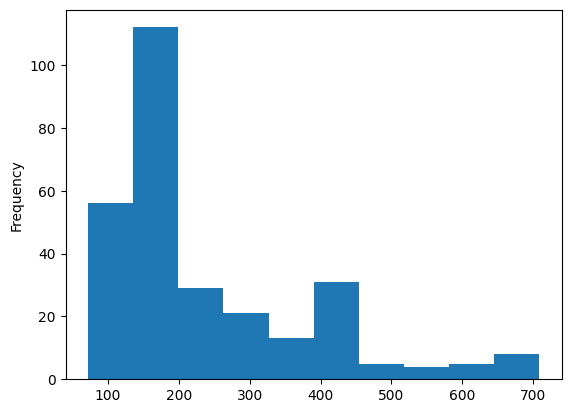

In [95]:
df['Average Mz'].plot.hist()

### 作业
- 读取LC-MS.csv文件
- 计算每行的峰面积（G2_1、G2_2、G2_3）的均值
- 显示均值的数据分布
- 将脚本保存为html文件
- html文件发送至邮箱6256691@qq.com,邮件主题：python智能化学作业01
- 3月24日之前提交